### AI Enterprise Workflow Capstone


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

Check sample data for training

In [2]:
with open('../data/cs-train/invoices-2017-12.json', 'r') as f:
  data = json.load(f)

df = pd.DataFrame(data)

In [3]:
df.head()

,country,customer_id,invoice,total_price,stream_id,times_viewed,year,month,day
0,United Kingdom,13162.0,490297,1.25,82093,4,2017,12,01
1,United Kingdom,13162.0,490297,2.10,84327A,12,2017,12,01
2,United Kingdom,13162.0,490297,4.65,47566,10,2017,12,01
3,United Kingdom,13162.0,490297,1.25,21868,12,2017,12,01
4,United Kingdom,13162.0,490297,3.45,22114,3,2017,12,01


In [4]:
df.dtypes

country          object
customer_id     float64
invoice          object
total_price     float64
stream_id        object
times_viewed      int64
year             object
month            object
day              object
dtype: object

In [5]:
df.shape

(35726, 9)

Get all json files using fetch_data function

In [6]:
from ingest_data import fetch_data

In [7]:
data_dir = '../data/cs-train'
full_data = fetch_data(data_dir)

In [8]:
full_data.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [9]:
full_data.shape

(815011, 10)

In [10]:
#determine top 10 countries
grouped_country = full_data.groupby(['country'])['price'].sum()

In [11]:
grouped_country.sort_values(ascending=False).head(10)

country
United Kingdom    3.521514e+06
EIRE              1.070692e+05
Germany           4.927182e+04
France            4.056514e+04
Norway            3.849475e+04
Spain             1.604099e+04
Hong Kong         1.445257e+04
Portugal          1.352867e+04
Singapore         1.317592e+04
Netherlands       1.232280e+04
Name: price, dtype: float64

In [12]:
#save the top 10 countries based on the result above
top10_countries = ['United Kingdom', 'EIRE', 'Germany', 'France', 'Norway', 'Spain', 'Hong Kong', 'Portugal',
                   'Singapore', 'Netherlands']

In [13]:
#define the top 10 in a data frame
top10 = full_data[full_data['country'].isin(top10_countries)]

In [14]:
top10.shape

(797867, 10)

In [15]:
full_data.shape

(815011, 10)

In [16]:
group10 = top10.groupby(['year', 'month', 'day']).agg({'price':'sum'})

In [17]:
print('Number of Days:', group10.shape[0]) 

Number of Days: 495


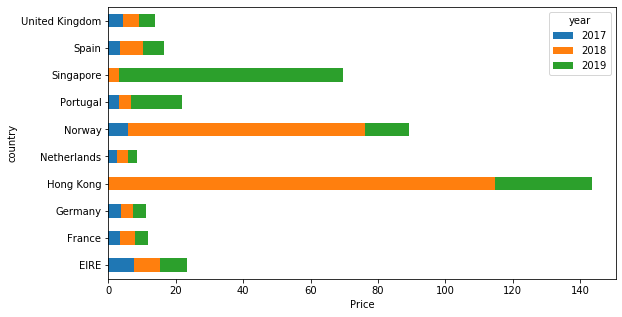

In [18]:
#plot the top countries 
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)

table = pd.pivot_table(top10,index='country',columns='year',values="price")
table.plot(kind='barh',stacked=True, ax=ax1)
ax1.set_xlabel("Price");